MNS 3
===

Dominik Krzemiński

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Analytical solutions to ODEs

(a)

$$
\frac{dx}{dt} = -x, \textrm{where } x_0 = 1\\
\int_{x_0}^{x} \frac{dx}{x} = - \int_{0}^{t} dt \\
\ln{x} - \ln{x_0} = - t \\
\textrm{but } \ln{1} = 0 \textrm{ so }\\
x = e^{-t}
$$

(b)
$$
\frac{dx}{dt} = \frac{1}{x}, \textrm{where } x_0 = 1\\
\int_{x_0}^{x} dx x = - \int_{0}^{t} dt \\
x - x_0^2 = - \int_{0}^{t} dt \\
x = - \sqrt{t+1}
$$

(c)
$$
\frac{dx}{dt} = 1-x, \textrm{where } x_0 = 0\\
\int_{x_0}^{x} \frac{dx}{1-x} = \int_{0}^{t} dt \\
- \ln{1-x} - \ln{1-x_0} = t \\
\ln{1-x} = - t \\
1-x = e^{-t}\\
x = 1-e^{-t}
$$

(d)
$$
\frac{dx}{dt} = x(1-x), \textrm{where } x_0 = 0\\
\int_{x_0}^{x} \frac{dx}{x(1-x)} = \int_{0}^{t} dt \\
\int_{x_0}^{x} \frac{1}{x} + \frac{1}{1-x} dx = t \\
\ln{\frac{x}{1-x}} = t \\
\frac{x}{1-x} = e^{t}\\
\frac{1-x}{x} = e^{-t}\\
x = \frac{1}{1+ e^{-t}} = \frac{e^{t}}{1 + e^{t}}
$$


## 2 Numerical solutions to ODEs

In [2]:
def euler(f_func, x_0, t_max, dt, **params):
    t = np.arange(0, t_max, dt)
    n = len(t)
    x = np.zeros((n,1))
    x[0] = x_0
    for i in range(1, n):
        x[i] = x[i-1] + f_func(x[i-1], t[i-1], **params)*dt
    return x

In [3]:
def logistic(x, t, **params):
    return x*(1-x)

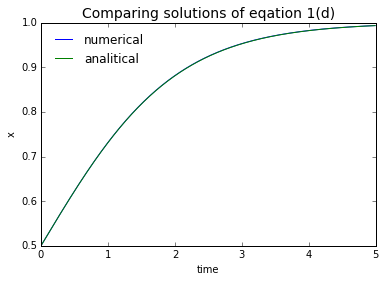

In [4]:
x_0, t_max, dt = 0.5, 5., 0.01
x_t = euler(logistic, x_0, t_max, dt)
t = np.arange(0, t_max, dt)
x_form = 1./(1+np.exp(-t))
plt.plot(t, x_t, label='numerical')
plt.plot(t, x_form, label='analitical')
plt.xlabel('time')
plt.ylabel('x')
plt.title(r'Comparing solutions of eqation 1(d) ', fontsize=14)
plt.legend(frameon=False, loc=2)
plt.show()

From the picture above we can see that numerical solution (blue line) perfectly match analytical equation (green line). This is not always the case. When we consider more complicated differential equations we can encounter numerical instabilities. Though still Euler method is one of the simplest way of solving such equastions. In mentioned cases one may try to use more sophisticated methods.

In [5]:
def f(x, t, **params): return 1-x

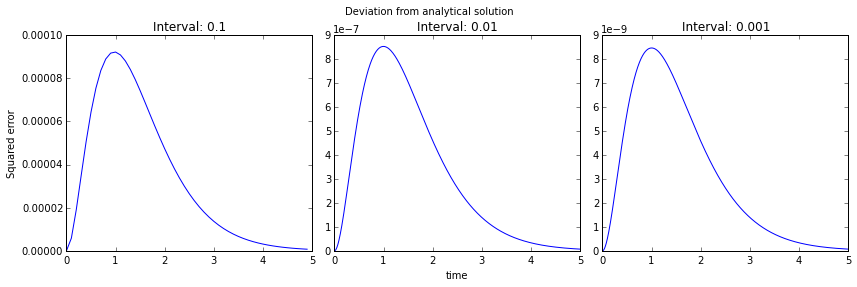

In [6]:
vecdt = [0.1, 0.01, 0.001]
fig, axes = plt.subplots(1, len(vecdt), figsize=(12,4))
for e, d in enumerate(vecdt):
    x_t = euler(f, x_0, t_max, d)
    t = np.arange(0, t_max, d)
    x_s = integrate.odeint(f, x_0, t)
    axes[e].plot(t, (x_t-x_s)**2)
    axes[e].set_title('Interval: {}'.format(d))
    if e==0:
        axes[e].set_ylabel('Squared error')
    if e==1:
        axes[e].set_xlabel('time')


plt.suptitle('Deviation from analytical solution')
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

Three pictures above show similar relation of squared error between analitical and numerical solutions. Let's look more closely at the scale of those pictures. We can see that it significantly decreases from left to right. This means that the lower interval we take, the lower error we get.

## 3. Passive membrane

In [7]:
tau = 10 #ms
Em = -80 # mV
I0 = 1e-9 #nA
Rm = 1e7 # Ohm
def passivemembrane(x, t):
    return (-x + Em + Rm*I0*1e-3)/tau

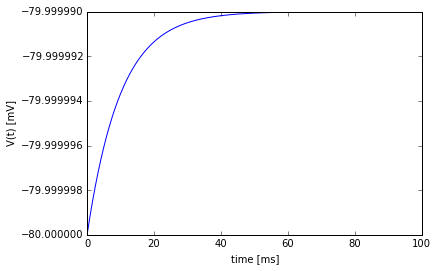

In [8]:
V_t = euler(passivemembrane, Em, 100, dt)
t = np.arange(0, 100, dt)
plt.plot(t, V_t)
plt.gca().yaxis.get_major_formatter().set_useOffset(False)
plt.xlabel('time [ms]')
plt.ylabel('V(t) [mV]')
plt.show()

The picture above agrees with what I would expect. Under given conditions we have a case of charging capacitor which shows exactly the same relations.

In [9]:
def passivemembrane2(x, t, fq=1, **params):
    return -x + Em + Rm*I0*1e-3*np.sin(2*np.pi*fq*t)

In [10]:
def plot_voltage(fq=1, tmax=3):
    dt = 0.001
    V_t = euler(passivemembrane2, Em, tmax, dt, fq=fq)
    t = np.arange(0, tmax, dt)
    plt.title('Frequency: {}'.format(fq))
    plt.plot(t, V_t, label='numerical solution')
    plt.plot(t, Em + Rm*I0*1e-3*np.sin(2*np.pi*fq*t), 'y', label='stimuli')
    plt.xlabel('time [ms]')
    plt.ylabel('V(t) [mV]')
    plt.gca().yaxis.get_major_formatter().set_useOffset(False)
    plt.legend(loc=4)
    plt.show()

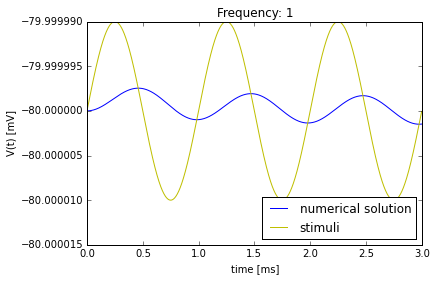

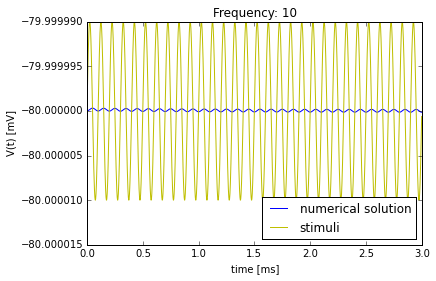

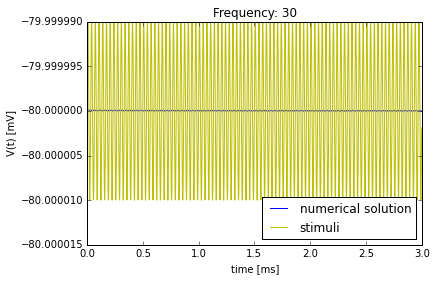

In [11]:
plot_voltage(fq=1)
plot_voltage(fq=10)
plot_voltage(fq=30)

Pictures above show relations between applied current and resulted membrane voltage. We see that we get also harmonic answer. The higher frequency of the lower amplitude we observe.

In [12]:
def get_ampphase(fq=1, tmax=5):
    dt = 0.001
    fs = 1./dt
    T = 1./fq
    period_pnts = fs*T
    t = np.arange(0, tmax, dt)
    Drv = I0*np.sin(2*np.pi*fq*t)
    V_t = euler(passivemembrane2, Em, tmax, dt, fq=fq)
    m1 = np.argmax(V_t[-period_pnts:])
    m2 = np.argmax(Drv[-period_pnts:])
    return np.max(V_t), m2-m1

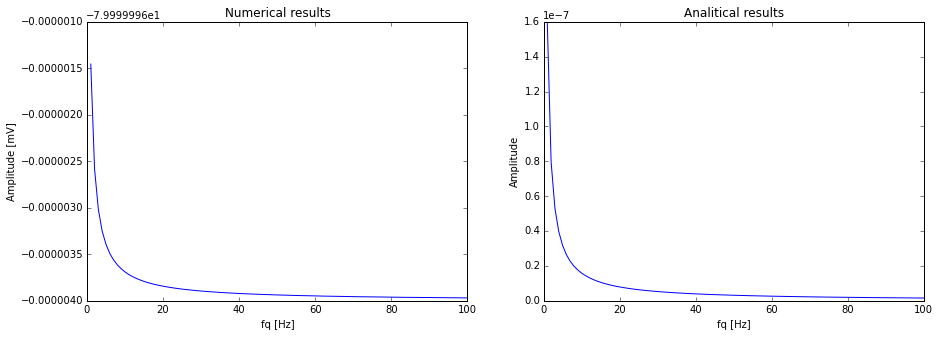

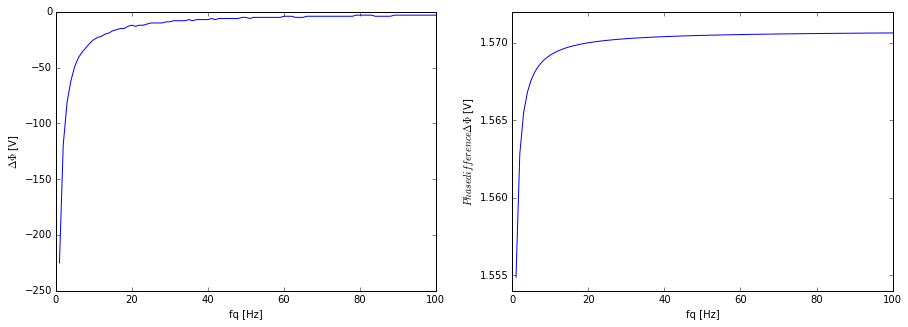

In [13]:
freqs = np.linspace(1,100,100)
amps = np.zeros(len(freqs))
phas = np.zeros(len(freqs))

for e, f in enumerate(freqs):
    amps[e], phas[e] = get_ampphase(f)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(freqs, amps)
plt.xlabel('fq [Hz]')
plt.ylabel('Amplitude [mV]')
plt.title('Numerical results')
plt.subplot(1,2,2)
plt.plot(freqs, I0*Rm*1e-3*np.sqrt(1./(1+(2*np.pi*freqs*tau)**2)))
plt.xlabel('fq [Hz]')
plt.ylabel('Amplitude')
plt.title('Analitical results')
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(freqs, phas)
plt.xlabel('fq [Hz]')
plt.ylabel('$\Delta \Phi$ [V]')
plt.subplot(1,2,2)
plt.plot(freqs, np.arctan(2*np.pi*freqs*tau))
plt.xlabel('fq [Hz]')
plt.ylabel('$Phase difference \Delta \Phi$ [V]')
plt.show()

In pictures I compered Euler method with analytical relations of amplitude and phase of response to different frequencies of stimuli from equation (2). In general relations are preserved. The only problem I encountered was scaling of y axis. I couldn't find problem which causes differences in values.